In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

In [2]:
# 데이터 로드

df = pd.read_csv("./data/KNN_multiclass_data.csv") # 데이터 로드

In [3]:
df.head(10)

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0,Type_C,0.000000,0.000000,0,0.000000,28.800730,0.000000,0,19.897913,0.000000,...,0.000000,22.205267,36.889362,0,4.008109,11.122004,0.000000,0,0.861596,0
1,Type_C,0.000000,7.379192,0,0.000000,55.324707,0.000000,0,17.763159,0.000000,...,0.000000,25.680260,36.490791,0,0.000000,0.000000,0.000000,0,18.000359,0
2,Type_C,0.000000,0.000000,0,0.000000,9.441565,0.000000,0,8.074228,5.014658,...,0.000000,0.000000,20.628450,0,2.239943,0.000000,0.000000,0,0.000000,0
3,Type_C,0.000000,0.000000,0,0.000000,38.792530,0.000000,0,19.175306,0.550448,...,11.169135,18.659679,7.790253,0,9.356702,0.000000,0.045151,0,0.000000,0
4,Type_C,0.000000,0.000000,0,11.082972,4.865292,0.000000,0,0.000000,8.450891,...,15.215648,24.295647,11.544920,0,0.000000,0.000000,0.000000,0,5.172331,0
5,Type_C,0.000000,0.000000,0,0.000000,0.000000,0.000000,0,15.023901,3.542971,...,0.000000,0.000000,18.815767,0,0.000000,19.855614,0.000000,0,0.000000,0
6,Type_C,0.000000,0.000000,0,0.000000,16.643148,0.000000,0,0.000000,7.105449,...,0.000000,0.000000,14.860317,0,0.000000,0.000000,0.000000,0,0.000000,0
7,Type_C,1.880968,0.000000,0,0.000000,0.000000,0.000000,0,1.695240,0.000000,...,0.000000,50.173447,32.229771,0,9.866442,8.500020,0.000000,0,0.000000,0
8,Type_C,0.000000,0.000000,0,0.000000,23.745300,13.970112,0,4.204913,10.745239,...,22.680828,9.743242,22.081636,0,0.000000,0.000000,6.477305,0,0.000000,0
9,Type_C,0.000000,0.469354,0,5.875203,32.415726,0.000000,0,6.380740,1.578491,...,0.000000,4.933801,26.821512,0,0.000000,0.000000,3.141470,0,4.770092,0


In [4]:
print(df.shape)
print(" ")
print(df['Class'].unique()) # 불량 유형 확인
print(" ")
print(df['Class'].value_counts()) # 불량 타입별 수 확인 

(2369, 61)
 
['Type_C' 'Type_B' 'Type_A' 'Type_D']
 
Class
Type_A    1140
Type_B     824
Type_C     268
Type_D     137
Name: count, dtype: int64


In [5]:
# 입력변수 출력변수 정의 
data_X = df.drop(["Class"], axis = 1)
data_Y = df['Class']

In [6]:
# test_size = 0.25학습 데이터와 테스트 데이터의 비율을 설정하는 하이퍼파라미터
# stratify = Y_label의 비율을 고려하여 나눠주는 하이퍼파라미터 (Class imbalance 상황에서는 설정하는 것이 굉장히 중요)
# shuffle = True

# 대부분의 하이퍼파라미터는 default가 존재함
# Ex1. 이미지들을 한번에 불러올때 imagedatagenerator 모듈을 사용함, shuffle 등의 하이퍼파라미터 default = False (X)
# Ex2. 시계열 데이터 처리, shuffle = False

training_data, validation_data , training_labels, validation_labels = \
train_test_split(data_X, data_Y, test_size = 0.2, shuffle =True, stratify=data_Y, random_state = 100)

In [7]:
print("학습 데이터 셋 크기")
print(training_labels.value_counts())
print("")
print("평가 데이터 셋 크기")
print(validation_labels.value_counts())

학습 데이터 셋 크기
Class
Type_A    912
Type_B    659
Type_C    214
Type_D    110
Name: count, dtype: int64

평가 데이터 셋 크기
Class
Type_A    228
Type_B    165
Type_C     54
Type_D     27
Name: count, dtype: int64


In [8]:
training_data = np.array(training_data)
validation_data = np.array(validation_data)
training_labels = np.array(training_labels)
validation_labels = np.array(validation_labels)

In [9]:
from sklearn.neighbors import KNeighborsClassifier 

# n_neighbors = K 
classifier = KNeighborsClassifier(n_neighbors = 3) # 1. 모델 선언
classifier.fit(training_data, training_labels) # 2. 모델 학습

train_preds = classifier.predict(training_data) # 3. 학습 데이터 예측
preds = classifier.predict(validation_data) # 테스트 데이터 예측

print("예측 결과")
print(preds[:10])
print("")
print("성능")
print(classifier.score(validation_data, validation_labels))

# Regresson 문제를 풀고자 하는 경우
from sklearn.neighbors import KNeighborsRegressor


예측 결과
['Type_A' 'Type_A' 'Type_A' 'Type_A' 'Type_C' 'Type_A' 'Type_A' 'Type_B'
 'Type_B' 'Type_C']

성능
0.9430379746835443


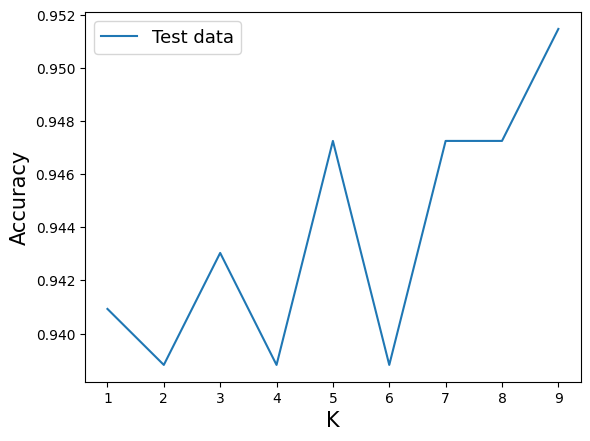

In [10]:
import matplotlib.pyplot as plt
k_list = range(1,10) # K 설정
train_accuracies = []
test_accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_data, training_labels)
  train_accuracies.append(classifier.score(training_data, training_labels))
  test_accuracies.append(classifier.score(validation_data, validation_labels))
#plt.plot(k_list, train_accuracies,label="Train data")
plt.plot(k_list, test_accuracies,label="Test data")
plt.xlabel("K",fontsize = 15)
plt.ylabel("Accuracy",fontsize = 15)
plt.legend(fontsize= 13)
plt.show()

In [11]:
def print_all_reg(Y_test,pred):
    # Specificity를 구하기 위해 confusion matrix를 이용

    cm1 = confusion_matrix(Y_test,pred)
    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])

    #결과 검사
    #recall = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    #pre = cm1[1,1]/(cm1[1,1]+cm1[0,1])

    G_mean = recall_score(Y_test,pred,average = 'weighted') * specificity1
    print("model의 recall 값은 {:.3f}".format(recall_score(Y_test,pred,average = 'weighted')))
    print("model의 2종 오류 확률 값은 {:.3f}".format(1-recall_score(Y_test,pred,average = 'weighted')))
    print("model의 Specificity 값은 {:.3f}".format(specificity1))
    print("model의 1종 오류 확률 값은 {:.3f}".format(1-specificity1))
    print("model의 precision 값은 {:.3f}".format(precision_score(Y_test,pred,average = 'weighted')))
    print("model의 f1_score 값은 {:.3f}".format(f1_score(Y_test,pred,average = 'weighted')))
    print("model의 G-mean 값은 {:.3f}".format(np.sqrt(G_mean)))
    print("model의 accuracy 값은 {:.3f}".format(accuracy_score(Y_test,pred)))

In [12]:
print_all_reg(training_labels,train_preds)
print(" ")
print_all_reg(validation_labels,preds)

model의 recall 값은 0.980
model의 2종 오류 확률 값은 0.020
model의 Specificity 값은 0.997
model의 1종 오류 확률 값은 0.003
model의 precision 값은 0.980
model의 f1_score 값은 0.980
model의 G-mean 값은 0.988
model의 accuracy 값은 0.980
 
model의 recall 값은 0.943
model의 2종 오류 확률 값은 0.057
model의 Specificity 값은 0.973
model의 1종 오류 확률 값은 0.027
model의 precision 값은 0.943
model의 f1_score 값은 0.943
model의 G-mean 값은 0.958
model의 accuracy 값은 0.943
